In [32]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import tensorflow as tf
import keras 
from keras import regularizers
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, SeparableConv2D
from keras.regularizers import l2
from keras.optimizers import SGD, RMSprop
from keras.utils import to_categorical
from keras.layers import BatchNormalization
from keras.utils import plot_model
from keras.layers import Input, GlobalAveragePooling2D
from keras import models
from keras.models import Model, Sequential

### READING DATA

In [2]:
train_path = 'training_face/training.csv'
test_path = 'test_face/test.csv'
lookid_path = 'IdLookupTable.csv'

train_data = pd.read_csv(train_path)  
test_data = pd.read_csv(test_path)
lookid_data = pd.read_csv(lookid_path)

In [3]:
train_data.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [4]:
train_data.isnull().any().value_counts()
train_data.ffill(inplace=True)

In [5]:
train_data.isnull().any().value_counts()

False    31
dtype: int64

In [6]:
image_list = []
for i in range(train_data['Image'].count()):
    image = train_data['Image'][i].split(' ')
    image_list.append(image)
    
print(len(image_list[1])) 

9216


In [7]:
image_list_array = np.array(image_list, dtype="float")
train_x = image_list_array.reshape(-1, 96, 96, 1)

### PLOTTING IMAGE

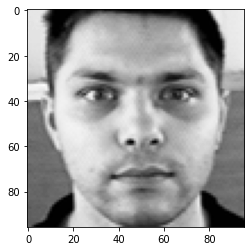

In [8]:
plt.imshow(train_x[3].reshape(96,96),cmap='gray')
plt.show()

### GETTING THE TRAINING FEATURES

In [9]:
train_y = []
training_labels = train_data.drop('Image', axis=1)

print(training_labels)

for i in range(0,7049):
    y = training_labels.iloc[i,:]

    train_y.append(y)
    
print(train_y[0])

      left_eye_center_x  left_eye_center_y  right_eye_center_x  \
0             66.033564          39.002274           30.227008   
1             64.332936          34.970077           29.949277   
2             65.057053          34.909642           30.903789   
3             65.225739          37.261774           32.023096   
4             66.725301          39.621261           32.244810   
...                 ...                ...                 ...   
7044          67.402546          31.842551           29.746749   
7045          66.134400          38.365501           30.478626   
7046          66.690732          36.845221           31.666420   
7047          70.965082          39.853666           30.543285   
7048          66.938311          43.424510           31.096059   

      right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
0              36.421678                59.582075                39.647423   
1              33.448715                58.856170  

In [10]:
train_y = np.array(train_y,dtype = 'float')
print(train_y[0])

[66.03356391 39.00227368 30.22700752 36.4216782  59.58207519 39.64742256
 73.13034586 39.96999699 36.35657143 37.3894015  23.45287218 37.3894015
 56.95326316 29.03364812 80.22712782 32.22813835 40.22760902 29.0023218
 16.35637895 29.64747068 44.42057143 57.06680301 61.19530827 79.97016541
 28.61449624 77.38899248 43.3126015  72.93545865 43.13070677 84.48577444]


In [11]:
shape_x = 96
shape_y = 96
nRows,nCols,nDims = train_x.shape[1:]
input_shape = (nRows, nCols, nDims)

### MODEL BUILDING

In [13]:
model = Sequential([
    Conv2D(32, (3, 3), strides=1,activation='relu', input_shape=(96, 96, 1), kernel_regularizer='l2'),
    MaxPooling2D((2, 2), strides=2),
    Dropout(0.1),
    BatchNormalization(),
    Conv2D(64, (2, 2), strides=1,activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    MaxPooling2D((2, 2), strides=2),
    BatchNormalization(),
    Conv2D(128, (2, 2), strides=1,activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    MaxPooling2D((2, 2), strides=2),
    BatchNormalization(),
    Conv2D(256, (2, 2), strides=1,activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    MaxPooling2D((2, 2), strides=2),
    BatchNormalization(),
    Flatten(),
    Dropout(0.1),
    Dense(500, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.1),
    Dense(500, activation='relu'),
    Dense(30)
])


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 94, 94, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 47, 47, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 47, 47, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 47, 47, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0

In [15]:
plot_model(model, to_file='/kaggle/working/model.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [16]:
from keras.optimizers import Adam
#default learning rate is 0.0001. Loss curve isnt converging so lets try with higher learning rate
optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, 
              loss='mean_squared_error',
              metrics=['mae', 'accuracy'])

### FITTING THE MODEL

In [17]:
history = model.fit(train_x,train_y,epochs = 350,batch_size = 32,validation_split = 0.2)

Epoch 1/350
177/177 [==============================] - 40s 220ms/step - loss: 116.9549 - mae: 6.4674 - accuracy: 0.4949 - val_loss: 80.0586 - val_mae: 7.2926 - val_accuracy: 0.6319
Epoch 2/350
177/177 [==============================] - 37s 212ms/step - loss: 23.9784 - mae: 3.5508 - accuracy: 0.6246 - val_loss: 15.7557 - val_mae: 2.7989 - val_accuracy: 0.6887
Epoch 3/350
177/177 [==============================] - 38s 213ms/step - loss: 21.4047 - mae: 3.3445 - accuracy: 0.6631 - val_loss: 14.1375 - val_mae: 2.6018 - val_accuracy: 0.7376
Epoch 4/350
177/177 [==============================] - 39s 219ms/step - loss: 20.6622 - mae: 3.2773 - accuracy: 0.6822 - val_loss: 13.4727 - val_mae: 2.4933 - val_accuracy: 0.7206
Epoch 5/350
177/177 [==============================] - 39s 221ms/step - loss: 17.7772 - mae: 3.0030 - accuracy: 0.7251 - val_loss: 18.4010 - val_mae: 3.1239 - val_accuracy: 0.7135
Epoch 6/350
177/177 [==============================] - 40s 228ms/step - loss: 16.1431 - mae: 2.8434

177/177 [==============================] - 36s 205ms/step - loss: 8.7874 - mae: 1.9063 - accuracy: 0.8331 - val_loss: 8.6213 - val_mae: 1.7660 - val_accuracy: 0.7617
Epoch 47/350
177/177 [==============================] - 37s 208ms/step - loss: 8.1959 - mae: 1.8168 - accuracy: 0.8303 - val_loss: 8.5153 - val_mae: 1.8314 - val_accuracy: 0.7426
Epoch 48/350
177/177 [==============================] - 37s 207ms/step - loss: 9.5101 - mae: 2.0103 - accuracy: 0.8239 - val_loss: 9.3482 - val_mae: 1.8857 - val_accuracy: 0.7539
Epoch 49/350
177/177 [==============================] - 36s 206ms/step - loss: 8.8128 - mae: 1.9140 - accuracy: 0.8273 - val_loss: 7.7635 - val_mae: 1.5800 - val_accuracy: 0.7830
Epoch 50/350
177/177 [==============================] - 37s 207ms/step - loss: 8.0127 - mae: 1.7839 - accuracy: 0.8340 - val_loss: 6.8007 - val_mae: 1.5050 - val_accuracy: 0.7823
Epoch 51/350
177/177 [==============================] - 2488s 14s/step - loss: 9.4718 - mae: 2.0196 - accuracy: 0.8239

Epoch 92/350
177/177 [==============================] - 37s 209ms/step - loss: 6.0883 - mae: 1.5482 - accuracy: 0.8512 - val_loss: 7.5265 - val_mae: 1.6909 - val_accuracy: 0.7262
Epoch 93/350
177/177 [==============================] - 37s 209ms/step - loss: 6.0770 - mae: 1.5508 - accuracy: 0.8555 - val_loss: 5.6209 - val_mae: 1.2771 - val_accuracy: 0.7574
Epoch 94/350
177/177 [==============================] - 37s 208ms/step - loss: 6.0926 - mae: 1.5546 - accuracy: 0.8486 - val_loss: 4.6850 - val_mae: 1.0820 - val_accuracy: 0.8007
Epoch 95/350
177/177 [==============================] - 37s 208ms/step - loss: 6.1137 - mae: 1.5554 - accuracy: 0.8454 - val_loss: 4.5895 - val_mae: 1.1479 - val_accuracy: 0.8191
Epoch 96/350
177/177 [==============================] - 37s 208ms/step - loss: 5.9260 - mae: 1.5270 - accuracy: 0.8594 - val_loss: 5.0227 - val_mae: 1.1604 - val_accuracy: 0.7844
Epoch 97/350
177/177 [==============================] - 37s 208ms/step - loss: 6.3986 - mae: 1.6155 - acc

177/177 [==============================] - 37s 209ms/step - loss: 5.5633 - mae: 1.5114 - accuracy: 0.8516 - val_loss: 4.5453 - val_mae: 1.1985 - val_accuracy: 0.7631
Epoch 138/350
177/177 [==============================] - 37s 210ms/step - loss: 5.2588 - mae: 1.4534 - accuracy: 0.8553 - val_loss: 4.4257 - val_mae: 1.1187 - val_accuracy: 0.7617
Epoch 139/350
177/177 [==============================] - 37s 209ms/step - loss: 4.9864 - mae: 1.4046 - accuracy: 0.8654 - val_loss: 4.0612 - val_mae: 0.9750 - val_accuracy: 0.8028
Epoch 140/350
177/177 [==============================] - 37s 208ms/step - loss: 5.0810 - mae: 1.4080 - accuracy: 0.8541 - val_loss: 6.1942 - val_mae: 1.7333 - val_accuracy: 0.7610
Epoch 141/350
177/177 [==============================] - 37s 208ms/step - loss: 5.2025 - mae: 1.4328 - accuracy: 0.8617 - val_loss: 6.1469 - val_mae: 1.5594 - val_accuracy: 0.7823
Epoch 142/350
177/177 [==============================] - 37s 208ms/step - loss: 5.4159 - mae: 1.4806 - accuracy: 0

177/177 [==============================] - 37s 206ms/step - loss: 4.6663 - mae: 1.3537 - accuracy: 0.8668 - val_loss: 4.9784 - val_mae: 1.4191 - val_accuracy: 0.7730
Epoch 183/350
177/177 [==============================] - 36s 206ms/step - loss: 4.7666 - mae: 1.3788 - accuracy: 0.8613 - val_loss: 4.8074 - val_mae: 1.1641 - val_accuracy: 0.7915
Epoch 184/350
177/177 [==============================] - 36s 203ms/step - loss: 4.7272 - mae: 1.3717 - accuracy: 0.8608 - val_loss: 7.3178 - val_mae: 1.7471 - val_accuracy: 0.7844
Epoch 185/350
177/177 [==============================] - 36s 203ms/step - loss: 4.6827 - mae: 1.3606 - accuracy: 0.8580 - val_loss: 4.9662 - val_mae: 1.4575 - val_accuracy: 0.7362
Epoch 186/350
177/177 [==============================] - 36s 205ms/step - loss: 4.6224 - mae: 1.3468 - accuracy: 0.8635 - val_loss: 4.1327 - val_mae: 1.0223 - val_accuracy: 0.7929
Epoch 187/350
177/177 [==============================] - 36s 205ms/step - loss: 4.7270 - mae: 1.3711 - accuracy: 0

177/177 [==============================] - 37s 209ms/step - loss: 4.6278 - mae: 1.3592 - accuracy: 0.8658 - val_loss: 5.9518 - val_mae: 1.5686 - val_accuracy: 0.7957
Epoch 228/350
177/177 [==============================] - 37s 209ms/step - loss: 4.7761 - mae: 1.3891 - accuracy: 0.8652 - val_loss: 6.1687 - val_mae: 1.6135 - val_accuracy: 0.7879
Epoch 229/350
177/177 [==============================] - 36s 205ms/step - loss: 4.6191 - mae: 1.3672 - accuracy: 0.8629 - val_loss: 4.0105 - val_mae: 1.0739 - val_accuracy: 0.7865
Epoch 230/350
177/177 [==============================] - 37s 208ms/step - loss: 4.5066 - mae: 1.3363 - accuracy: 0.8668 - val_loss: 4.2271 - val_mae: 1.0130 - val_accuracy: 0.7539
Epoch 231/350
177/177 [==============================] - 37s 209ms/step - loss: 4.4470 - mae: 1.3160 - accuracy: 0.8684 - val_loss: 5.8241 - val_mae: 1.3503 - val_accuracy: 0.7660
Epoch 232/350
177/177 [==============================] - 36s 205ms/step - loss: 4.4300 - mae: 1.3230 - accuracy: 0

177/177 [==============================] - 37s 207ms/step - loss: 4.4446 - mae: 1.3416 - accuracy: 0.8666 - val_loss: 3.8606 - val_mae: 1.0640 - val_accuracy: 0.7830
Epoch 273/350
177/177 [==============================] - 37s 208ms/step - loss: 4.2591 - mae: 1.3009 - accuracy: 0.8727 - val_loss: 4.4595 - val_mae: 1.2515 - val_accuracy: 0.7426
Epoch 274/350
177/177 [==============================] - 37s 207ms/step - loss: 4.3095 - mae: 1.3209 - accuracy: 0.8652 - val_loss: 5.0743 - val_mae: 1.2849 - val_accuracy: 0.7780
Epoch 275/350
177/177 [==============================] - 37s 208ms/step - loss: 4.4364 - mae: 1.3398 - accuracy: 0.8656 - val_loss: 4.5874 - val_mae: 1.1881 - val_accuracy: 0.7411
Epoch 276/350
177/177 [==============================] - 37s 209ms/step - loss: 4.2749 - mae: 1.2994 - accuracy: 0.8620 - val_loss: 3.6516 - val_mae: 0.8691 - val_accuracy: 0.7674
Epoch 277/350
177/177 [==============================] - 37s 209ms/step - loss: 4.1735 - mae: 1.2927 - accuracy: 0

177/177 [==============================] - 36s 204ms/step - loss: 4.2896 - mae: 1.3235 - accuracy: 0.8652 - val_loss: 3.7423 - val_mae: 0.9843 - val_accuracy: 0.7475
Epoch 318/350
177/177 [==============================] - 37s 207ms/step - loss: 4.5089 - mae: 1.3685 - accuracy: 0.8674 - val_loss: 4.3504 - val_mae: 1.0729 - val_accuracy: 0.8021
Epoch 319/350
177/177 [==============================] - 37s 208ms/step - loss: 4.2321 - mae: 1.2911 - accuracy: 0.8617 - val_loss: 5.1406 - val_mae: 1.3912 - val_accuracy: 0.7539
Epoch 320/350
177/177 [==============================] - 37s 207ms/step - loss: 4.3121 - mae: 1.3226 - accuracy: 0.8674 - val_loss: 3.5090 - val_mae: 0.8134 - val_accuracy: 0.7957
Epoch 321/350
177/177 [==============================] - 36s 205ms/step - loss: 4.0344 - mae: 1.2607 - accuracy: 0.8663 - val_loss: 5.0771 - val_mae: 1.3194 - val_accuracy: 0.7390
Epoch 322/350
177/177 [==============================] - 36s 205ms/step - loss: 4.3367 - mae: 1.3258 - accuracy: 0

In [18]:
def plotAccuracy(accuracy, val_accuracy):
    plt.plot(accuracy)
    plt.plot(val_accuracy)
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    
def plotLoss(loss, val_loss):
    plt.plot(loss)
    plt.plot(val_loss)
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.ylim(0, 10)
    plt.show()


### VISUALIZING ACCURACY WHILE TRAINING AND VALIDATION

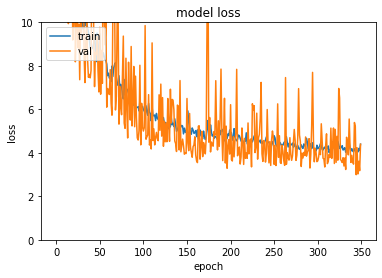

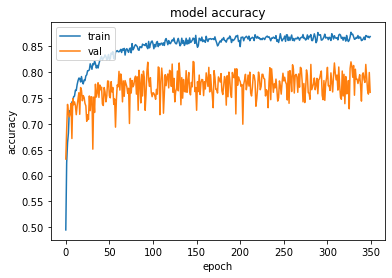

In [19]:
history.history.keys()

plotLoss(history.history['loss'], history.history['val_loss'])
plotAccuracy(history.history['accuracy'], history.history['val_accuracy'])

In [20]:
test_images = []
for i in range(0,1783):
    img = test_data['Image'][i].split(' ')
    img = ['0' if x == '' else x for x in img]
    
    test_images.append(img)

In [21]:
test_images = np.array(test_images,dtype = 'float')
X_test = test_images.reshape(-1,96,96,1) 

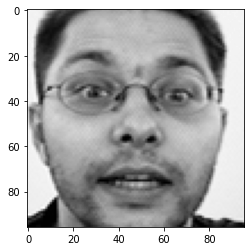

In [22]:
plt.imshow(X_test[0].reshape(96,96),cmap = 'gray')
plt.show() 

In [29]:
pred = model.predict(X_test)

56/56 [==============================] - 2s 42ms/step


In [30]:
pred

array([[66.874435, 37.266556, 29.179626, ..., 69.1588  , 47.799355,
        82.970566],
       [67.85373 , 36.132545, 27.5984  , ..., 75.19794 , 50.24408 ,
        86.07698 ],
       [66.80891 , 35.748512, 30.626703, ..., 70.455284, 50.0649  ,
        82.31548 ],
       ...,
       [68.48403 , 41.849686, 33.200516, ..., 76.907646, 45.99525 ,
        78.4848  ],
       [64.9489  , 38.08466 , 29.41014 , ..., 77.290955, 44.42377 ,
        74.12643 ],
       [68.94082 , 39.640877, 31.091263, ..., 76.811264, 47.064095,
        80.47589 ]], dtype=float32)

In [31]:
train_y[0]

array([66.03356391, 39.00227368, 30.22700752, 36.4216782 , 59.58207519,
       39.64742256, 73.13034586, 39.96999699, 36.35657143, 37.3894015 ,
       23.45287218, 37.3894015 , 56.95326316, 29.03364812, 80.22712782,
       32.22813835, 40.22760902, 29.0023218 , 16.35637895, 29.64747068,
       44.42057143, 57.06680301, 61.19530827, 79.97016541, 28.61449624,
       77.38899248, 43.3126015 , 72.93545865, 43.13070677, 84.48577444])